## Task 1: Levensthein-Distance

**Hand-In**: Your implementation of the Levensthein-Algorithm.

The [Levensthein-Distance](https://en.wikipedia.org/wiki/Levenshtein_distance), or minimum edit distance, describes the minimum number of changes (deletions, insertions, substitutions) that are needed to convert one string to another.

Example: The Levensthein-Distance of `house` and `home` is 2.

1.   `hose` (delete 'u')
2.   `home` (substitute 's' with 'm')

You don't have to calculate the Levensthein-Distance by hand, however. It is described by a recursive algorithm. Below, you can see it displayed in 'mathematical' writing. We've also included a more detailed text description of how it works.

Your task will to be to tranform this algorithm into a recursive python function.

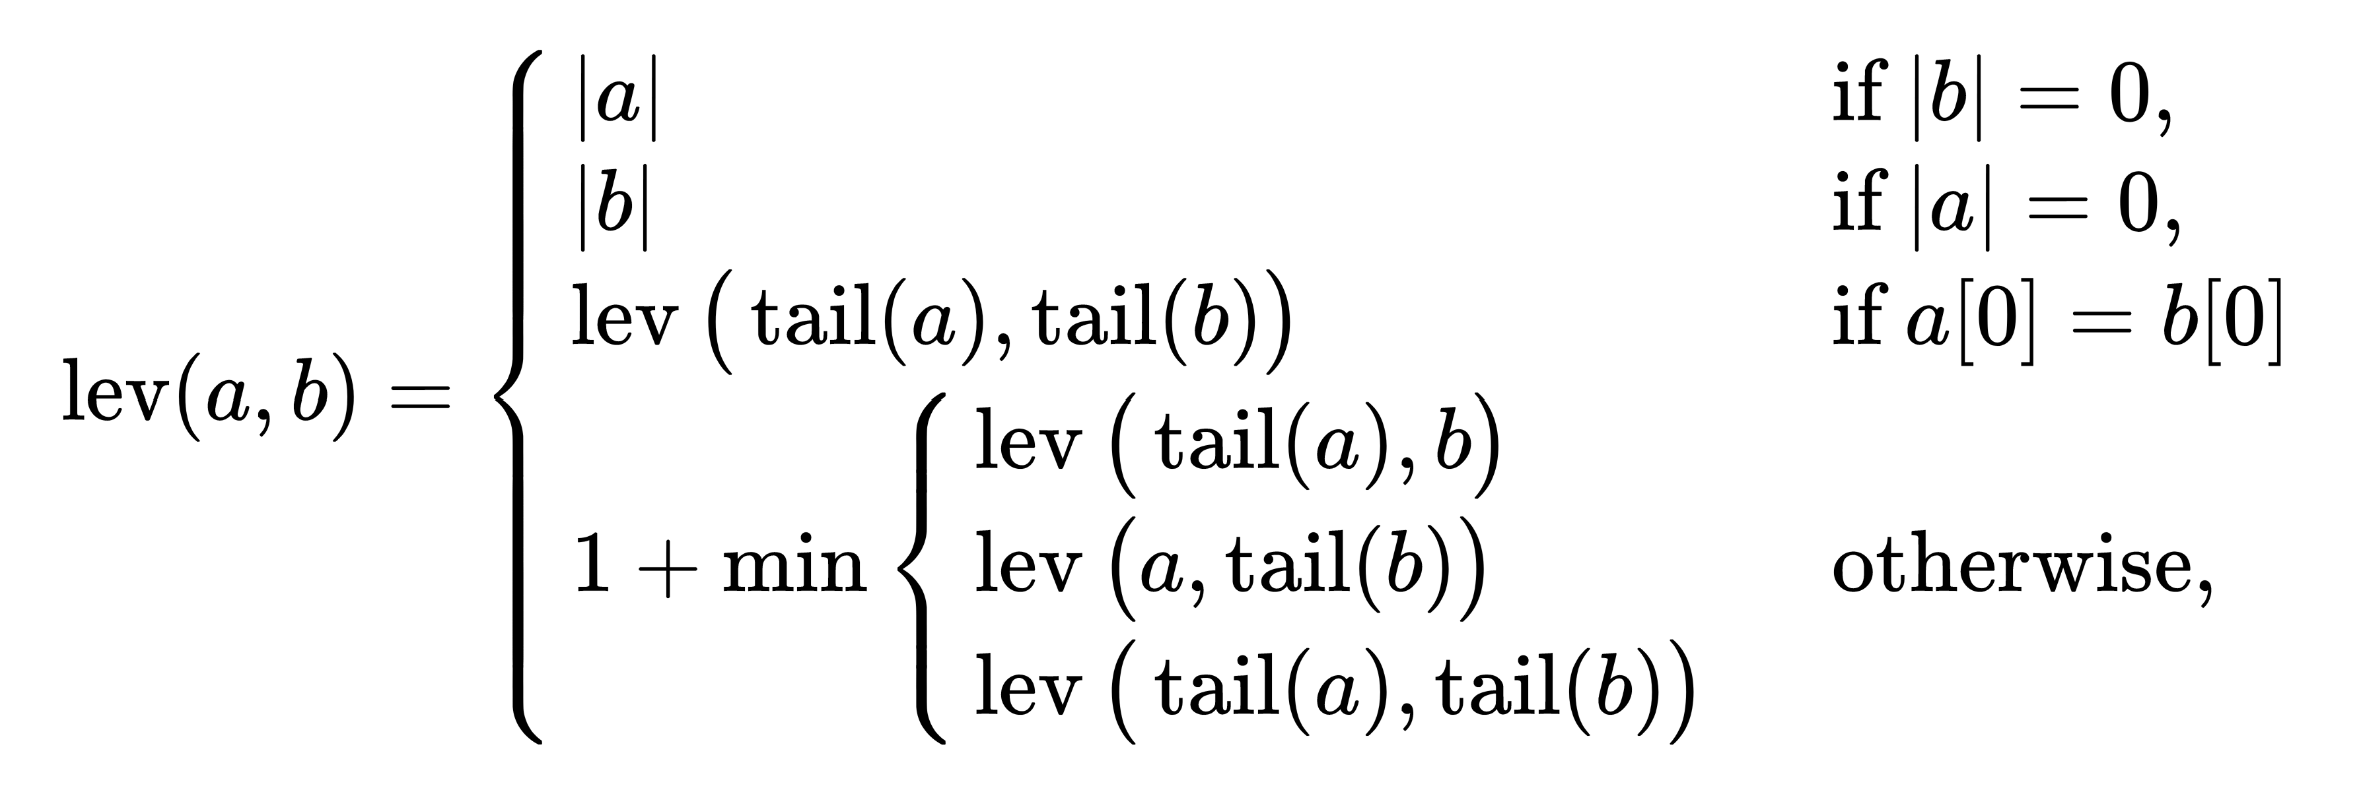

### Levensthein-Distance: How the algorithm works

The Levensthein-Algorithm is a **recursive** algorithm. That means it calls itself with 'easier' versions of the problem, until it is able to solve them using a base case. Here, the first two 'if's are the base cases, the other two call the `lev()` function again.

The function `lev(a,b)` returns an integer reflecting what the minimum-edit distance between the strings a and b is. We distinguish between four 'if' cases:

**if $|b|=0: |a|$**

String b has length 0, meaning it is empty. We just need to completely delete string a, so the minimum edit distance is the nr of characters that need to be deleted.

**if $|a|=0: |b|$**

Same as for case 1, but the other way around: Since string a is completely empty, we need to spell out string b from scratch. Therefore, the edit distance is the length of b.

**if $a[0] = b[0]: lev(tail(a), tail(b))$**

$tail()$ means everything but the first letter. If the first letter of a and b are identical, nothing needs to be changed. We move on to the rest of the string, calling the lev-function again. Using our example, we would move on to calculate the Levensthein-Distance of "ouse" and "ome".

**otherwise :**

This is the most complex case. We calculate three different options and then pick the one that results in the smallest number of edits.
Using our example again, these are the options:
*   the distance between 'ome' and 'house'
*   the distance between 'house' and 'ome'
*   the distance between 'ome' and 'ouse'

To the smallest edit distance out of these three we add one edit, since this is what we are doing by slicing the strings here. 




In [ ]:
def lev(a, b):
  # TODO: Implement the algorithm

In [ ]:
# SOLUTION
def lev(a, b):
  """
  This function returns the minimum edit distance between the strings a and b.
  """
  # case 1
  if len(b) == 0:
    return len(a)
  
  # case 2
  elif len(a) == 0:
    return len(b)

  # case 3
  elif a[0] == b[0]:
    return lev(a[1:], b[1:])

  # case 4
  else:
    minimum = min(lev(a[1:], b),
                  lev(a, b[1:]),
                  lev(a[1:], b[1:]))
    return minimum + 1

In [ ]:
lev("house", "home")

2

## Task 2: Fibonacci Numbers

**Hand-In:** A dynamic programming implementation of the Fibonacci-Algorithm.

Like the Levensthein-Distance, the [Fibonacci numbers](https://en.wikipedia.org/wiki/Fibonacci_number) are also described by a recursive algorithm. The algorithm is defined as follows:


$F_n = F_{n-1} + F_{n-2}$

with n being the nth Fibonacci-number. The only exception are the starting values:

$F_0 = 0$

$F_1 = 1$

You can see the python implementation below:

In [ ]:
def fibonacci(n):
  """
  returns: the nth Fibonacci-number
  """

  #print("Calculating n:", n)
  
  if n == 0:
    return 0

  elif n == 1:
    return 1

  else:
    return fibonacci(n-1) + fibonacci(n-2)

In [ ]:
print("The 10th Fibonacci number:", fibonacci(50))

### Dynamic Programming: Fibonacci Numbers

Recursive algorithms can be simple and powerful, but many of them have the same flaw: They can be **extremly inefficient**.

Since the function ends up calling itself several times in each run, the number of executions stack up fast. The main problem here is that since the function has no memory, it ends up calculating the same thing over and over again!

If you want to see this in action, simply remove the # in front of the print statement in the `fibonacci()` function above.

This is where **dynamic programming** comes in: Since the algorithm has no memory, it has to re-calculate the same steps again and again in every recursion. To solve this issue, we simply add a way to store values we have already calculated.

**Hints:**

*   Your 'memory storage' can just be a list.
*   You will need to remove the recursion from the algorithm, meaning it shouldn't call itself anymore. This is because otherwise it won't be able to 'remember' what it previously calculated.






In [ ]:
def dynamic_fibonacci(n):
  # TODO: Implement the fibonacci-algorithm dynamically (with memory storage)

In [ ]:

# SOLUTION
def dynamic_fibonacci(n):
  memory = [0 for j in range(n)]
  for i in range(n):
    if i == 0:
      memory[i] = 0

    elif i == 1:
      memory[i] = 1

    else:
      memory[i] = memory[i-1] + memory[i-2]
  return memory[i-1]

In [ ]:
print("The 10th Fibonacci number:", dynamic_fibonacci(10))
print("The 50th Fibonacci number:", dynamic_fibonacci(1000))

The 10th Fibonacci number: 21
The 50th Fibonacci number: 16602747662452097049541800472897701834948051198384828062358553091918573717701170201065510185595898605104094736918879278462233015981029522997836311232618760539199036765399799926731433239718860373345088375054249


## Task 3: Sorting and Asymptotic Complexity

### Part A:

**Hand-In:**

*   Part A: Your modified implementation of MergeSort.
*   Part B: Your answers to the questions.


For this task use reddit_dadjokes.csv as your data. For every joke create a tuple containing the joke's text as the first and its score as the second element, then store those tuples in a list. Sort the jokes according to their scores in descending order (i.e. starting at the largest score). To achieve this use the sorting algorithm already implemented below which is called **MergeSort** and works according to the following outline:

It is designed to recursively split an array of integers in half and then solve the problem by first sorting the two parts individually and then combining them again. This split happens until the newly generated split only consists of a single element, which has to be sorted by definition. The combination works by filling a new empty array with the - now sorted - content of both halfs of the original. This is acomplished by repeatedly choosing the smallest element from either the first half or the second half and then copying this one over to the new array. As both halfs are sorted, the smallest element of any given half has to be at the start.

To achieve the task specifications, a few modifications need to be made to the original MergeSort as implemented below:

- The implemented version of MergeSort expects a list of integers as its input, so this needs to be adapted to the new data type which is a list containing tuples of string and integers.

- You will need to change the ordering as this version of MergeSort will sort the jokes in ascending order (i.e. starting at the smallest element).

- Inside MergeSort check if the list to be sorted only has up to 6 elements. If so then use BubbleSort to sort this small part.

- Implement BubbleSort as described in the lecture and tutorial.


### Part B:

For this part list the **worst case Asymptotic Complexities** of both MergeSort and BubbleSort as well as an explanation of why you arrive at those. Why is the combination of MergeSort with BubbleSort as we did above still helpful?

### Your answer:

In [ ]:
# import for correct type hints
from typing import List, Tuple

In [ ]:
def merge(array, left, right):
  i = j = k = 0
  while i < len(left) and j < len(right):
    if left[i] < right[j]:
      array[k] = left[i]
      i+=1
    else:
      array[k] = right[j]
      j+=1
    k+=1
  while i < len(left):
    array[k] = left[i]
    i+=1
    k+=1
  while j < len(right):
    array[k] = right[j]
    j+=1
    k+=1

In [ ]:
def merge_sort(array: List[int]):
  if len(array) > 1:
    mid = len(array)//2
    left = array[:mid]
    right = array[mid:]
    merge_sort(left)
    merge_sort(right)
    merge(array, left, right)

## Solution A

In [ ]:
# implementation of bubble sort like in the lecture slides
def bubble_sort(array: List[Tuple[str, int]]): # updatet type hints as the array is now a list of tuples with the string (joke) first and then the integer score
  n = len(array)
  for i in range(n): # all indexes of the array (0, 1, 2 ... n-1)
    swapped = False
    for j in range(0, n-i-1): # index where the smallest element of the subarray should go (last position of the subarray)
      if array[j][1] < array[j+1][1]: # if two neighbouring elements are in the wrong order (smaller before the bigger) exchange them, compare at the second part of the tuple (index 1, the integer score)
        array[j], array[j+1] = array[j+1], array[j]
        swapped = True
    
    if swapped == False:
      break #if there was no swapping during this loop, the array is already sorted and we can stop

In [ ]:
# impementation of merge sort like in the lecture slides
def merge(array, left, right):
  i = j = k = 0
  while i < len(left) and j < len(right): # while there are still elements in left and right subarray
    if left[i][1] > right[j][1]: # change where to compare the elements (second part, index 1, integer score), choose bigger element first
      array[k] = left[i]
      i+=1 # indexes from left gets bigger as element from left was chosen
    else:
      array[k] = right[j]
      j+=1 # indexes of right subarray gets bigger as element from right was chosen
    k+=1 # indexes of combining array goes always up
  while i < len(left): # if there are only elements in the left part left, choose those
    array[k] = left[i]
    i+=1
    k+=1
  while j < len(right): # if there are only elements in the right part, choose those
    array[k] = right[j]
    j+=1
    k+=1

In [ ]:
def merge_sort(array: List[Tuple[str, int]]):
  if len(array) <= 6: # if array to be sorted is smaller or equal to length 6
    bubble_sort(array) # bubble sort it
  elif len(array) > 1: # else if it's still biger than 1 do merge sort
    mid = len(array)//2
    left = array[:mid]
    right = array[mid:]
    merge_sort(left)
    merge_sort(right)
    merge(array, left, right)

In [1]:
import csv
jokes = []
with open('dadjokes_sample.csv', encoding='utf-8') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader, None) # Skip headers
  for row in reader:
    try:
      jokes.append((row[2], int(row[3])))
    except ValueError: # can't convert rating to integer, escape it
      continue

print(jokes)
merge_sort(jokes)
print(jokes)

FileNotFoundError: [Errno 2] No such file or directory: 'dadjokes_sample.csv'

### Solution B:

BubbleSort uses two nested for-loops. The outer loop is excuted at the order of n times and for each outer loop, the inner loop is exectued at the order of n times. Therefor n**2

For MergeSort we have to go down until single elements and at each step we half the array, meaning that we need log(n) steps to arrive at the bottom, while for each step we have to do a merge at the order of n. Therefor n*log(n)

MergeSort is very efficient for the first larger part as the (sub)array size is greatly reduced with each step as it is halfed. However, because MergeSort splits the array up down to individual elements, this last part gets very tidious and it's faster to just sort the array at once like in BubbleSort.